In [1]:
# simple classification using neural network
# adapted from iris classification
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import get_dummies
from sklearn.model_selection import train_test_split

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# read the sample data file, use any of the sammple data files created
csvfilename = 'train_50.csv'

data = pd.read_csv('sampledata/'+ csvfilename)
# reshape dataframe to keep the relevant data
data = data[['mav5', 'mav10', 'mav20', 'mav30', 'mav50', 'mav100', 'Action']]

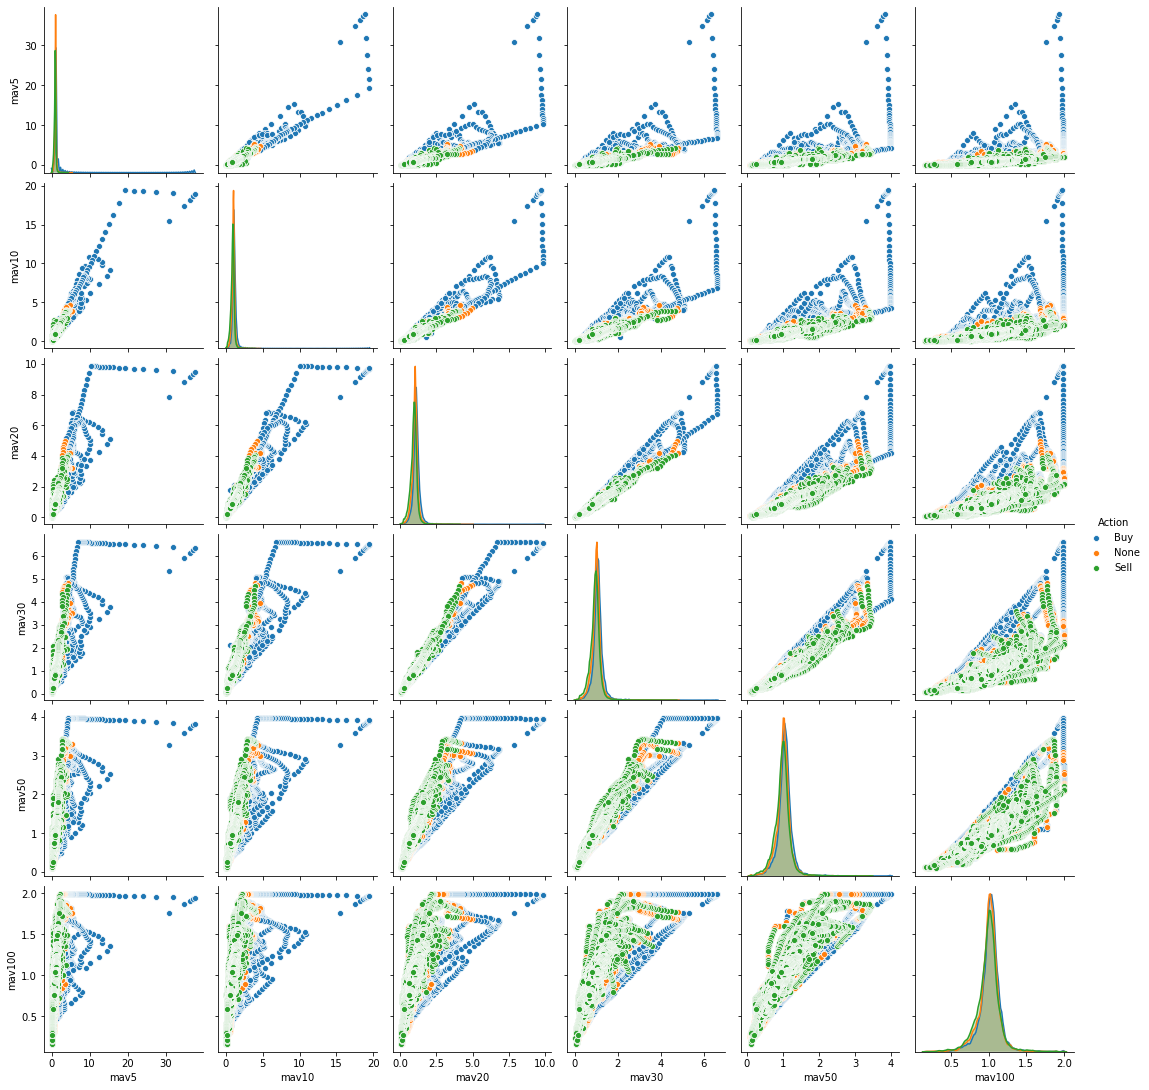

In [3]:
# plot data 
g=sns.pairplot(data, hue="Action", height= 2.5)

In [4]:
# set up the classifier
cols = data.columns
features = cols[0:6]
labels = cols[6]

#Shuffle The data
indices = data.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
X = data.reindex(indices)[features]
y = data.reindex(indices)[labels]

y = get_dummies(y)

In [5]:
# Split data into Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

In [6]:
# define accuracy function
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

In [7]:
training_size = X_train.shape[1]
test_size = X_test.shape[1]
num_features = 6
num_labels = 3

num_hidden = 10

graph = tf.Graph()
with graph.as_default():
    tf_train_set    = tf.constant(X_train)
    tf_train_labels = tf.constant(y_train)
    tf_valid_set    = tf.constant(X_test)
 
    
    print(tf_train_set)
    print(tf_train_labels)
    
    ## Note, since there is only 1 layer there are actually no hidden layers... but if there were
    ## there would be num_hidden
    weights_1 = tf.Variable(tf.truncated_normal([num_features, num_hidden]))
    weights_2 = tf.Variable(tf.truncated_normal([num_hidden, num_labels]))
    ## tf.zeros Automaticaly adjusts rows to input data batch size
    bias_1 = tf.Variable(tf.zeros([num_hidden]))
    bias_2 = tf.Variable(tf.zeros([num_labels]))
    
    
    logits_1 = tf.matmul(tf_train_set , weights_1 ) + bias_1
    rel_1 = tf.nn.relu(logits_1)
    logits_2 = tf.matmul(rel_1, weights_2) + bias_2
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits_2, labels=tf_train_labels))
    optimizer = tf.train.GradientDescentOptimizer(.005).minimize(loss)
    
    ## Training prediction
    predict_train = tf.nn.softmax(logits_2)
    
    # Validation prediction
    logits_1_val = tf.matmul(tf_valid_set, weights_1) + bias_1
    rel_1_val    = tf.nn.relu(logits_1_val)
    logits_2_val = tf.matmul(rel_1_val, weights_2) + bias_2
    predict_valid = tf.nn.softmax(logits_2_val)

Tensor("Const:0", shape=(117372, 6), dtype=float32)
Tensor("Const_1:0", shape=(117372, 3), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [8]:
with graph.as_default():
    saver = tf.train.Saver()
num_steps = 10000
with tf.Session(graph = graph) as session:
    session.run(tf.global_variables_initializer())
    print(loss.eval())
    for step in range(num_steps):
        _,l, predictions = session.run([optimizer, loss, predict_train])
        
        if (step % 2000 == 0):
              #print(predictions[3:6])
              print('Loss at step %d: %f' % (step, l))
              print('Training accuracy: %.1f%%' % accuracy( predictions, y_train[:, :]))
              print('Validation accuracy: %.1f%%' % accuracy(predict_valid.eval(), y_test))
              saver.save(session,"simpleclass/bs.ckpt")

2.7496953
Loss at step 0: 2.749695
Training accuracy: 25.4%
Validation accuracy: 25.5%
Loss at step 2000: 0.954313
Training accuracy: 59.5%
Validation accuracy: 59.5%
Loss at step 4000: 0.907844
Training accuracy: 62.0%
Validation accuracy: 62.1%
Loss at step 6000: 0.867550
Training accuracy: 63.9%
Validation accuracy: 63.8%
Loss at step 8000: 0.830283
Training accuracy: 65.6%
Validation accuracy: 65.6%


In [9]:
csvfilename = 'test_100.csv'

data = pd.read_csv('sampledata/'+ csvfilename)
# reshape dataframe to keep the relevant data
data = data[['mav5', 'mav10', 'mav20', 'mav30', 'mav50', 'mav100', 'Action']]
cols = data.columns
features = cols[0:6]
labels = cols[6]

#Shuffle The data
indices = data.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
X = data.reindex(indices)[features]
y = data.reindex(indices)[labels]

y = get_dummies(y)